# Exploratory Data Anlysis
* This notebook is going to focus on exploring the datasets.
* Particularly, after data collection, storage and preprocessing, there are in total three datasets that we will use in our project.
    1. Stock Tweets
    2. News
    3. Stock Price
* The time range that we will cover is 2014 to 2016.
* Without further ado, let's explore the first dataset: Stock tweets.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dir_path = './datasets/cashcowputer-dataset'

## Sentiment dataset

In [91]:
sentiment_df = pd.read_csv(f'{dir_path}/raw/tweet_senti_dataset.csv',usecols=[0,1,2,3])

* The dataset consists of four columns: ItemID, Sentiment, SentimentSource, and SentimentText

In [92]:
sentiment_df.head()

,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...


In [94]:
sentiment_df.describe()

,ItemID,Sentiment
count,1.578614e+06,1.578614e+06
mean,7.893198e+05,5.005517e-01
std,4.557076e+05,4.999999e-01
min,1.000000e+00,0.000000e+00
25%,3.946652e+05,0.000000e+00
50%,7.893205e+05,1.000000e+00
75%,1.183974e+06,1.000000e+00
max,1.578627e+06,1.000000e+00


## Data validation

In [96]:
assert(sentiment_df.shape[0]==sentiment_df.ItemID.max())

AssertionError: 

* There are some problems with the dataset. Some rows are collapsed.

In [97]:
sentiment_df[sentiment_df['ItemID']==5182]

,ItemID,Sentiment,SentimentSource,SentimentText
5180,5182,0,Kaggle,"DA VINCI CODE SUCKS.\r\n5183,0,Kaggle, I hate..."


In [98]:
sentiment_df[sentiment_df['ItemID']==5183]

,ItemID,Sentiment,SentimentSource,SentimentText


* Why is that?

Let's take a look at the raw file, without using csv reader

In [100]:
temp = {}
with open(f'{dir_path}/raw/tweet_senti_dataset.csv', "r", encoding="utf-8-sig") as f:
    counter = 0
    for line in f:
        temp[counter] = line
        counter+=1

In [105]:
temp[5183]

'5183,0,Kaggle," I hate Harry Potter.\n'

* As you can see from the above example, the text contains a double quote in the beginning without properly close it without another double quote at the end. Let fix this together

In [254]:
import csv,sys
temp = {}
with open(f'{dir_path}/raw/tweet_senti_dataset.csv', "r", encoding="utf-8-sig") as f, open(f'{dir_path}/raw/fixed_senti_dataset.csv',"a+") as to_write_f:
    counter = 0
    for line in f:
        line = line.replace('"','')
        line = line.replace("'","")
        to_write_f.write(line)
        temp[counter] = line
        counter+=1

In [256]:
fixed_dataset = pd.read_csv(f'{dir_path}/raw/fixed_senti_dataset.csv',usecols=[0,1,2,3])

In [257]:
assert(fixed_dataset.shape[0]==fixed_dataset.ItemID.max())

In [258]:
fixed_dataset[fixed_dataset['ItemID']==5182]

,ItemID,Sentiment,SentimentSource,SentimentText
5181,5182,0,Kaggle,DA VINCI CODE SUCKS.


In [259]:
fixed_dataset[fixed_dataset['ItemID']==5183]

,ItemID,Sentiment,SentimentSource,SentimentText
5182,5183,0,Kaggle,I hate Harry Potter.


## Any missing data?

In [260]:
fixed_dataset.isnull().values.any()

True

In [261]:
fixed_dataset[fixed_dataset['SentimentText'].isna() == True]

,ItemID,Sentiment,SentimentSource,SentimentText
13084,13085,1,Sentiment140,NaN
13085,13086,1,Sentiment140,NaN
13086,13087,0,Sentiment140,NaN
13087,13088,0,Sentiment140,NaN
13088,13089,0,Sentiment140,NaN
13089,13090,1,Sentiment140,NaN
13090,13091,1,Sentiment140,NaN
13091,13092,1,Sentiment140,NaN
13092,13093,1,Sentiment140,NaN
13093,13094,0,Sentiment140,NaN


In [262]:
fixed_dataset.shape, fixed_dataset.dropna().shape

((1578627, 4), (1578582, 4))

In [263]:
fixed_dataset = fixed_dataset.dropna(axis=0)

In [264]:
fixed_dataset.isnull().values.any()

False

In [265]:
fixed_dataset.head()

,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. Iv...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...


In [267]:
fixed_dataset.to_csv(f'{dir_path}/raw/fixed_senti_dataset.csv',index=False)

## FIXED!

* Let's take a look at one example of the tweet

In [117]:
fixed_dataset['SentimentText'][2]

'              omg its already 7:30 :O'

# Any duplicates?

In [330]:
fixed_dataset.duplicated().values.any()

False

* As you can see, there are:
    1. extra whitespaces in the beginning
    2. abbreviations-> omg
    3. emoticons-> :O

* There are a lot of 'rt' here, as you can see from the below

In [154]:
target_re = re.compile(r'(\brt\b)')
fixed_dataset[fixed_dataset['SentimentText'].str.match(r'(\brt\b)') == True].head().values

array([[1120487, 0, 'Sentiment140',
        'rt @@jose3030 Jay-Z just pushed Ron Browz out of a window. R.I.P. lil homie '],
       [1120488, 0, 'Sentiment140', 'rt @abisignorelli #f1 oh no'],
       [1120489, 0, 'Sentiment140', 'rt @algarman if in Seattle'],
       [1120490, 1, 'Sentiment140',
        'rt @antdog927 Damn I know how to hire people.  Ok maybe two didnt work out but 2 out of 10 aint bad Antdog [you got good taste4talent]'],
       [1120492, 0, 'Sentiment140',
        'rt @astroboi http://bit.ly/6oBIA ftw? // y seria todo con AC/DC  @chileanskies']],
      dtype=object)

* And there are a lot of URLs too. What the URL looks like is actually not important? Can we replace it with a dummy pattern like "LINK" or url?

In [155]:
url_pattern = re.compile(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+')
url_pattern.sub('url', 'rt @astroboi http://bit.ly/6oBIA ftw?')

'rt @astroboi url ftw?'

* @person

In [129]:
fixed_dataset[fixed_dataset['SentimentText'].str.contains('@') == True].head()

,ItemID,Sentiment,SentimentSource,SentimentText
9,10,1,Sentiment140,hmmmm.... i wonder how she my number @-)
19,20,0,Sentiment140,I just cut my beard off. Its only been gro...
45,46,1,Sentiment140,@ginaaa &lt;3 GO TO THE SHOW TONIGHT
46,47,0,Sentiment140,@Spiral_galaxy @YMPtweet it really makes me...
73,74,0,Sentiment140,I wanna be at home @ church...I wonder wht t...


* #hashtag

In [130]:
fixed_dataset[fixed_dataset['SentimentText'].str.contains('#') == True].head()

,ItemID,Sentiment,SentimentSource,SentimentText
131,132,0,Sentiment140,#3turnoffwords this shit sucks
132,133,0,Sentiment140,#asylm J2 panel is over. Guess its back to no...
133,134,1,Sentiment140,#poemsunder140 ....started by @shannonelyse1
134,135,0,Sentiment140,#squarespace brighten my bad day! i never win...
135,136,0,Sentiment140,#Susan Boyle didnt win! mh well


In [136]:
fixed_dataset[fixed_dataset['SentimentText'].str.contains('#') == True].tail().SentimentText.values

array(['Youre right- I did not want milk with my cereal this morning. Thanks for finishing it off  #squarespace',
       'Youtube #fail ',
       'Youtube is getting bgoder on buzzing right now. Suspended is boldest #jbyoutubesuspended  Come on JoBro fans ',
       'Yup - late for work!   But not nearly as late as the UN an international &quot;human rights&quot; organizations are in working to free #Gilad !',
       'Zero and 1-Click attacks. Nice. I swear this session is just about hackers!!  Just kidding. #spbpc #spbpuk'],
      dtype=object)

* phonetic abbreviation

In [131]:
fixed_dataset[fixed_dataset['SentimentText'].str.contains('b4') == True].head()

,ItemID,Sentiment,SentimentSource,SentimentText
593,594,0,Sentiment140,at work and got loads to do b4 I leave today....
1642,1643,1,Sentiment140,da baby sleep now my gosh now its time 4 me 2...
7400,7401,1,Sentiment140,#iremember my first kiss crazy how it was onl...
7468,7469,0,Sentiment140,#iremember when we were soo stuck on each othr...
9204,9205,0,Sentiment140,#Badsex: is when you delete there number out y...


* look at the above, you can see there are some weird strings: &quot. Let's convert it back to double quote before removing special characters. All these &xx pattern can be expanded using BeautifulSoup Package. Let's take a look below

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup('&gt123&quot &ge', "html.parser")
stripped_text = soup.get_text()
print(stripped_text)

* Treatment to each of the feature:
    1. @person -> drop @
    2. #hashtag -> drop the whole
    3. drop emoticons
    4. replace url with simpler text to reduce dimension and avoid dummy tokenization
    5. phonetic abbreviation -> ignore (i drop all numbers)

In [281]:
from pycontractions import Contractions
# Load pretrained Google word2Vec model
contraction_expander = Contractions("./models/GoogleNews-vectors-negative300.bin")

In [283]:
test = "They're going to the zoo and she'll be home for dinner."
answer = "they are going to the zoo and she will be home for dinner."
assert(list(contraction_expander.expand_texts([text]))[0] == answer)

In [284]:
from bs4 import BeautifulSoup
import unicodedata
import re

def replace_url(text):
    url_pattern = re.compile(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+')
    return url_pattern.sub('url', text)

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    return stripped_text

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def expand_contractions(text):
    return list(contraction_expander.expand_texts([text]))[0]

def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', text)
    return text

def pre_process_document(document):
    try:
        document = strip_html_tags(document) #replace &quot
        document = document.lower()
        document = replace_url(document)
        # remove extra newlines (often might be present in really noisy text)
        document = document.translate(document.maketrans("\n\t\r", "   "))
        # remove accented characters
        document = remove_accented_chars(document)
        # expand contractions    
        document = expand_contractions(document)  
        # remove special characters and\or digits    
        # insert spaces between special characters to isolate them    
        special_char_pattern = re.compile(r'([{.(-)!}])')
        document = special_char_pattern.sub(" \\1 ", document)
        document = remove_special_characters(document, remove_digits=True)  
        # remove extra whitespace
        document = re.sub(' +', ' ', document)
        document = document.strip()
    except AttributeError:
        print (document)
    return document

## Data Validattion

In [228]:
answer ='yup late for work but not nearly as late as the un an international human rights organizations are in working to free gilad'
test_text = '     Yup - late for work!   But not nearly as late as the UN an international &quot;human rights&quot; organizations are in working to free #Gilad !'

In [229]:
assert(pre_process_document(test_text) == answer)

In [230]:
answer1 = 'rt astroboi url ftw'
test1= 'rt @astroboi http://bit.ly/6oBIA ftw?'

In [231]:
assert(pre_process_document(test1) == answer1)

In [232]:
test2= 'I buy an iphone with $123,000'
answer2 = 'i buy an iphone with'
assert(pre_process_document(test2)==answer2)

## Now, let's preprocess the data in bulk

In [285]:
fixed_dataset = pd.read_csv(f'{dir_path}/raw/fixed_senti_dataset.csv',usecols=[0,1,2,3])

In [286]:
fixed_dataset['cleaned_text'] = fixed_dataset['SentimentText'].apply(pre_process_document)

/Users/user/miniconda3/envs/project/lib/python3.6/site-packages/bs4/__init__.py:302: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/Users/user/miniconda3/envs/project/lib/python3.6/site-packages/bs4/__init__.py:375: UserWarning: "http://twitpic.com/6taka" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/user/miniconda3/envs/project/lib/python3.6/site-packages/bs4/__init__.py:375: UserWarning: "http://twitpic.com/7g8z1" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/user/min

In [287]:
fixed_dataset.head()

,ItemID,Sentiment,SentimentSource,SentimentText,cleaned_text
0,1,0,Sentiment140,is so sad for my APL frie...,is so sad for my apl friend
1,2,0,Sentiment140,I missed the New Moon trail...,i missed the new moon trailer
2,3,1,Sentiment140,omg its already 7:30 :O,omg its already o
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. Iv...,omgaga I am sooo I am gunna cry I have been at...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me tt


In [288]:
assert(fixed_dataset.isnull().values.any() == False)

In [289]:
fixed_dataset.to_csv(f'{dir_path}/preprocessed/preprocessed2_tweet_senti_dataset.csv',index=False)

In [697]:
fixed_dataset_by_sentiment = fixed_dataset.groupby(fixed_dataset.Sentiment)
summary = fixed_dataset_by_sentiment.describe()
summary

ItemID                                                          \
              count           mean            std  min        25%       50%   
Sentiment                                                                     
0          788420.0  840470.262001  449226.934670  1.0  474947.50  868253.5   
1          790162.0  738307.931818  456397.024055  3.0  339384.25  706536.5   

                                  
                  75%        max  
Sentiment                         
0          1223865.25  1578627.0  
1          1135600.75  1578624.0

/Users/user/miniconda3/envs/project/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


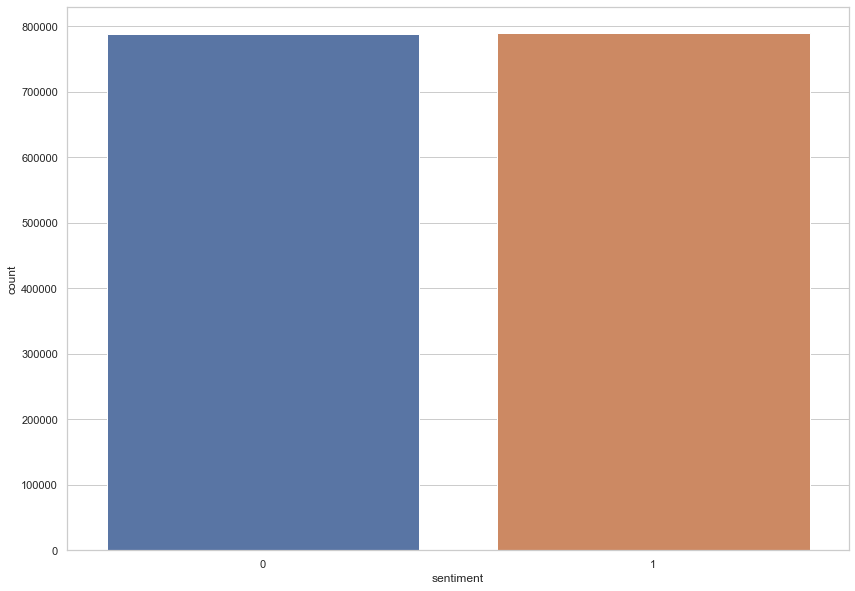

In [699]:
data = summary.ItemID
data['sentiment'] = data.index.values
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))
ax = sns.barplot(x='sentiment',y='count',data=data)

## Stock Tweets

### Raw dataset

* Let's take a look at one of the example:

In [333]:
raw_tweet_example = pd.read_json('./datasets/stocknet-dataset/tweet/raw/AAPL/2014-01-01',lines=True)

In [334]:
raw_tweet_example.head()

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,contributors,retweeted_status,retweet_count,favorite_count,entities,favorited,retweeted,filter_level,lang,possibly_sensitive
0,2014-01-01 03:59:03+00:00,418229860210057216,418229860210057216,RT @philstockworld: Summary of Yesterday's Web...,web,False,NaN,NaN,NaN,NaN,...,NaN,{'created_at': 'Tue Dec 31 12:33:51 +0000 2013...,0,0,"{'hashtags': [{'text': 'TraderEducation', 'ind...",False,False,medium,en,NaN
1,2014-01-01 03:29:29+00:00,418222419485421568,418222419485421568,RT @philstockworld: Summary of Yesterday's Web...,web,False,NaN,NaN,NaN,NaN,...,NaN,{'created_at': 'Tue Dec 31 12:33:51 +0000 2013...,0,0,"{'hashtags': [{'text': 'TraderEducation', 'ind...",False,False,medium,en,NaN
2,2014-01-01 18:08:47+00:00,418443702579654656,418443702579654656,iTV Will Boost Apple http://t.co/8dup4cQc08 $A...,"<a href=""http://seekingalpha.com"" rel=""nofollo...",False,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,"{'hashtags': [{'text': 'APPLE', 'indices': [50...",False,False,medium,en,0.0
3,2014-01-01 01:52:31+00:00,418198017015959552,418198017015959552,#iPhone users are more intelligent than #Samsu...,web,False,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,"{'hashtags': [{'text': 'iPhone', 'indices': [0...",False,False,medium,en,0.0
4,2014-01-01 01:18:36+00:00,418189481607696384,418189481607696384,RT @philstockworld: Summary of Yesterday's Web...,web,False,NaN,NaN,NaN,NaN,...,NaN,{'created_at': 'Tue Dec 31 12:33:51 +0000 2013...,0,0,"{'hashtags': [{'text': 'TraderEducation', 'ind...",False,False,medium,en,NaN


* The preprocessing steps are just the same as what we have used in the sentiment dataset and it is done in another notebook:"Data preprocessing Tweets.ipynb"

### Tweets exploration

In [3]:
preprocessed_tweets = pd.read_csv('./datasets/cashcowputer-dataset/preprocessed/tweets/all_stock_tweets.csv')

In [4]:
preprocessed_tweets.sort_values(by=['timestamp'],inplace=True)

In [5]:
preprocessed_tweets.describe()

,timestamp,source,asset,cleaned_text
count,105561,105561,105561,105561
unique,786,1,87,77988
top,2015-07-23,tweet,AAPL,url
freq,397,105561,17772,1036


In [6]:
preprocessed_tweets.head()

,timestamp,source,asset,cleaned_text
25411,2014-01-01,tweet,PM,weekly s p hashtag stocks hashtag trend dis cs...
7639,2014-01-01,tweet,AAPL,rt user summary of yesterday s webcast featuri...
7640,2014-01-01,tweet,AAPL,apple screwed up big time url
7641,2014-01-01,tweet,AAPL,number wrap up and trading set review part i url
7642,2014-01-01,tweet,AAPL,hashtag i phone hashtag users are more intelli...


In [7]:
preprocessed_tweets.shape

(105561, 4)

In [8]:
preprocessed_tweets_by_asset = preprocessed_tweets.groupby(preprocessed_tweets.asset)

In [12]:
asset_list = preprocessed_tweets.asset.unique().tolist()
len(asset_list)

87

In [36]:
x = preprocessed_tweets_by_asset.get_group('AAPL')
y = x.groupby(x.timestamp)

#### Number of tweets per stock

In [83]:
raw_tweets = pd.read_csv('./datasets/cashcowputer-dataset/raw/all_stock_tweets.csv')

In [84]:
raw_tweets.dropna(axis=0,inplace=True)
raw_tweets.drop_duplicates(keep='first',inplace=True)

In [85]:
raw_tweets_by_asset = raw_tweets.groupby(raw_tweets.asset)

In [86]:
summary = raw_tweets_by_asset.describe()
summary

timestamp                         source                       title  \
          count unique         top freq  count unique    top   freq  count   
asset                                                                        
AAPL      17772    784  2014-09-09  143  17772      1  tweet  17772  17772   
ABB          99     89  2016-01-21    2     99      1  tweet     99     99   
ABBV        875    428  2015-03-05   18    875      1  tweet    875    875   
AEP         218    165  2014-07-02    6    218      1  tweet    218    218   
AGFS          7      7  2016-03-23    1      7      1  tweet      7      7   
...         ...    ...         ...  ...    ...    ...    ...    ...    ...   
V          1308    558  2015-07-23   11   1308      1  tweet   1308   1308   
VZ         1110    521  2015-05-12   20   1110      1  tweet   1110   1110   
WFC        1049    498  2014-01-14   16   1049      1  tweet   1049   1049   
WMT        1554    560  2015-10-14   36   1554      1  tweet   1554   1554   
XOM        1782    600  2015-04-04   53   1782      1  tweet   1782   1782   

                                                                     content  \
      unique                                                top freq   count   
asset                                                                          
AAPL   17360  Just Imagine if you could Find market's Intrad...   19   17772   
ABB       97  RT @ABBgroupnews: $ABB unveils intelligent voi...    3      99   
ABBV     867  RT @MarkSchoenebaum: $ABBV all but saying they...    2     875   
AEP      218  RT @MarketCurrents: Credit Suisse picks five f...    1     218   
AGFS       7  JNPR Volume\nSee Here ---&gt; https://t.co/2nx...    1       7   
...      ...                                                ...  ...     ...   
V       1295  RT @SupremeSees: $NERV Da Short of the Day and...    6    1308   
VZ      1092  Trading Strategies Partners: https://t.co/Updd...    3    1110   
WFC     1039  New to trading and need to build your trading ...    4    1049   
WMT     1538  RT @philstockworld: $WMT misses!  Bad Sign for...    3    1554   
XOM     1758  RT @philstockworld: $XOM hedge up 300%, $SCO h...    3    1782   

                                                                      
      unique                                                top freq  
asset                                                                 
AAPL   17360  Just Imagine if you could Find market's Intrad...   19  
ABB       97  RT @ABBgroupnews: $ABB unveils intelligent voi...    3  
ABBV     867  RT @MarkSchoenebaum: $ABBV all but saying they...    2  
AEP      218  RT @MarketCurrents: Credit Suisse picks five f...    1  
AGFS       7  JNPR Volume\nSee Here ---&gt; https://t.co/2nx...    1  
...      ...                                                ...  ...  
V       1295  RT @SupremeSees: $NERV Da Short of the Day and...    6  
VZ      1092  Trading Strategies Partners: https://t.co/Updd...    3  
WFC     1039  New to trading and need to build your trading ...    4  
WMT     1538  RT @philstockworld: $WMT misses!  Bad Sign for...    3  
XOM     1758  RT @philstockworld: $XOM hedge up 300%, $SCO h...    3  

[87 rows x 16 columns]

In [87]:
data = summary.title.unique.to_frame()
data = summary.title
data['stocks'] = data.index.values
data['count'] = data.unique
data

/Users/user/miniconda3/envs/project/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/user/miniconda3/envs/project/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,count,unique,top,freq,stocks
asset,,,,,
AAPL,17360,17360,Just Imagine if you could Find market's Intrad...,19,AAPL
ABB,97,97,RT @ABBgroupnews: $ABB unveils intelligent voi...,3,ABB
ABBV,867,867,RT @MarkSchoenebaum: $ABBV all but saying they...,2,ABBV
AEP,218,218,RT @MarketCurrents: Credit Suisse picks five f...,1,AEP
AGFS,7,7,JNPR Volume\nSee Here ---&gt; https://t.co/2nx...,1,AGFS
...,...,...,...,...,...
V,1295,1295,RT @SupremeSees: $NERV Da Short of the Day and...,6,V
VZ,1092,1092,Trading Strategies Partners: https://t.co/Updd...,3,VZ
WFC,1039,1039,New to trading and need to build your trading ...,4,WFC


In [88]:
data.sort_values(by=['count'], inplace=True,ascending=False)

/Users/user/miniconda3/envs/project/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
data.head(8)

,count,unique,top,freq,stocks
asset,,,,,
AAPL,17360,17360,Just Imagine if you could Find market's Intrad...,19,AAPL
FB,9451,9451,$ES_F $SPX $SPY $DJI $QQQ $YM_F $NQ_F $TF_F $F...,22,FB
GOOG,5876,5876,http://t.co/Z9ez8uGMdH &lt;-- This Ebook can t...,4,GOOG
AMZN,5334,5334,RT @danprimack: Can you legally yell 'Fire' in...,11,AMZN
T,5108,5108,There is a CO$T To GREATNESS and there are NO ...,11,T
MSFT,3228,3228,RT @greatspoke: Top Stock Analyst Pick List De...,6,MSFT
D,2909,2909,L$D,201,D
BABA,2908,2908,RT @greatspoke: Analyst Report on Top Stock Ma...,7,BABA


In [90]:
data.head(8).index.values.tolist()

['AAPL', 'FB', 'GOOG', 'AMZN', 'T', 'MSFT', 'D', 'BABA']

In [91]:
stocks_index = data.head(8).index.values.tolist()
stocks_index.append('others')
stocks_index = pd.Index(stocks_index)
count = data['count'].head(8).values.tolist()
others = data.tail(79)['count'].values.sum()
count.append(others)
new_dict = {
    'count':count
}

In [93]:
new_df = pd.DataFrame(new_dict,index=stocks_index)

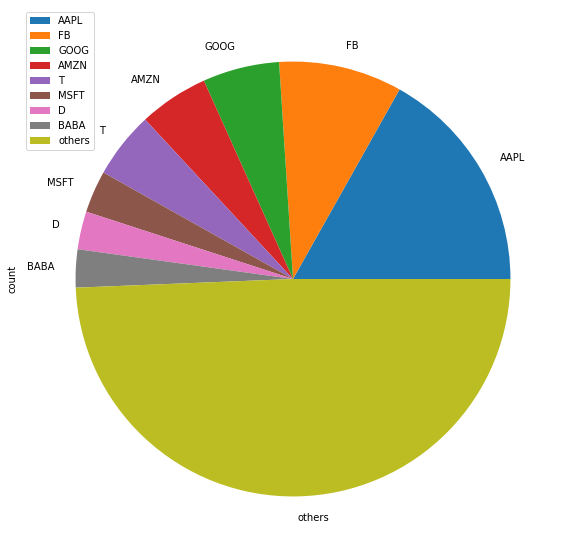

In [94]:
new_df.plot.pie(y='count', figsize=(14, 10))

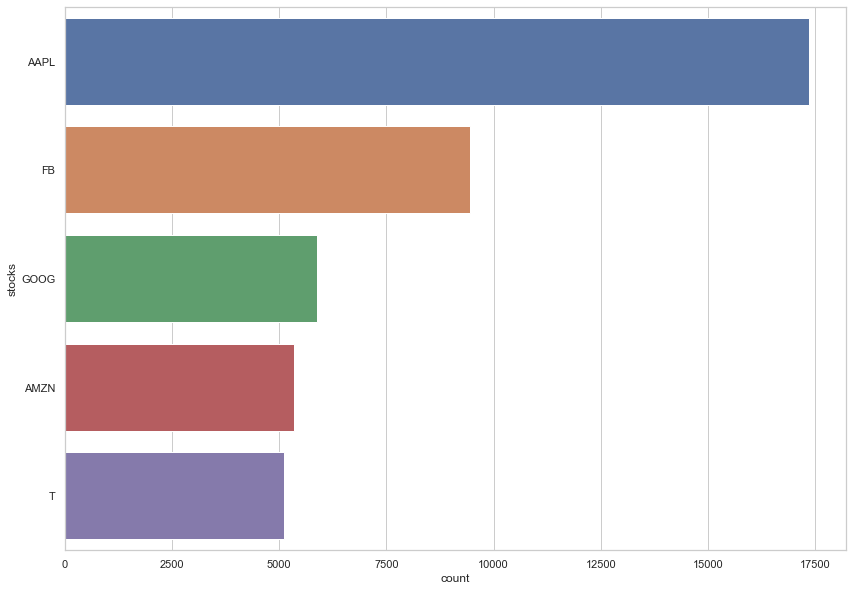

In [32]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))
ax = sns.barplot(x='count',y='stocks',data=data.head())

In [33]:
data = summary.timestamp
data['stocks'] = data.index.values
data['average'] = data['count'].div(data['unique'])
data.sort_values(by=['average'], inplace=True,ascending=False)
data.head()

/Users/user/miniconda3/envs/project/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/user/miniconda3/envs/project/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/user/miniconda3/envs/project/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,count,unique,top,freq,stocks,average
asset,,,,,,
AAPL,17772,784,2014-09-09,143,AAPL,22.6684
FB,9743,780,2014-02-20,86,FB,12.491
GOOG,5972,767,2015-08-11,55,GOOG,7.78618
AMZN,5435,759,2015-07-23,54,AMZN,7.16074
T,5216,771,2014-06-12,102,T,6.76524


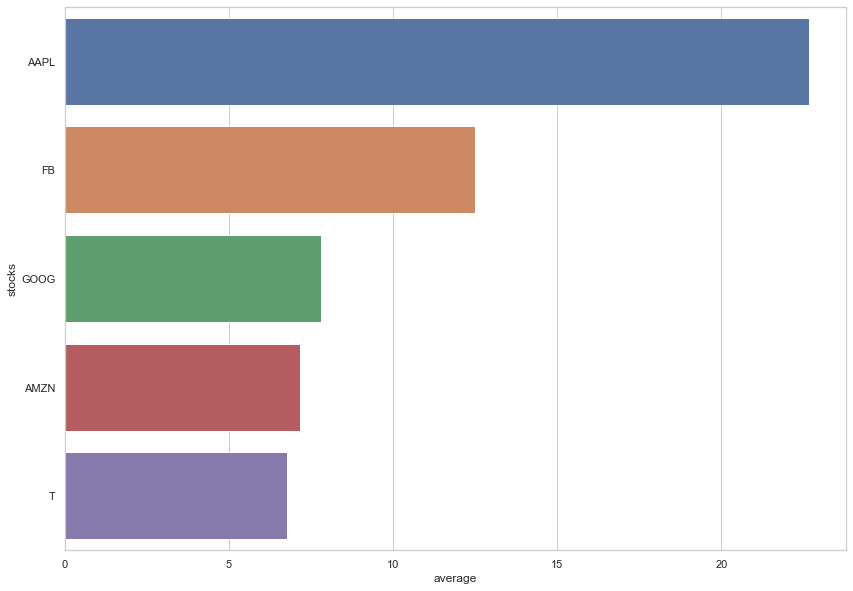

In [34]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))
ax = sns.barplot(x='average',y='stocks',data=data.head())

#### Extra Tokenization for word frequency visualization

In [13]:
raw_tweets = pd.read_csv(f'{dir_path}/raw/all_stock_tweets.csv')

/Users/user/miniconda3/envs/project/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [346]:
import re
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

In [361]:
sentences = [
    "CANT WAIT for the new season of #TwinPeaks ＼(^o^)／!!! #davidlynch #tvseries :)))",
    "I saw the new #johndoe movie and it suuuuucks!!! WAISTED $10... #badmovies :/",
    "@SentimentSymp:  can't wait for the Nov 9 #Sentiment talks!  YAAAAAAY !!! :-D http://sentimentsymposium.com/.",
    "RT @marcobonzanini: just an example! :D http://example.com #NLP"
]

for s in sentences:
    print(preprocess(s))

['CANT', 'WAIT', 'for', 'the', 'new', 'season', 'of', '#TwinPeaks', '＼', '(', '^', 'o', '^', ')', '／', '!', '!', '!', '#davidlynch', '#tvseries', ':)', ')', ')']
['I', 'saw', 'the', 'new', '#johndoe', 'movie', 'and', 'it', 'suuuuucks', '!', '!', '!', 'WAISTED', '$', '10', '.', '.', '.', '#badmovies', ':/']
['@SentimentSymp', ':', "can't", 'wait', 'for', 'the', 'Nov', '9', '#Sentiment', 'talks', '!', 'YAAAAAAY', '!', '!', '!', ':-D', 'http://sentimentsymposium.com/.']
['RT', '@marcobonzanini', ':', 'just', 'an', 'example', '!', ':D', 'http://example.com', '#NLP']


In [40]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['url', 'email', 'percent', 'money', 'phone', 'user',
        'time', 'url', 'date', 'number'],
    # terms that will be annotated
    annotate={"hashtag", "allcaps", "elongated", "repeated",
        'emphasis', 'censored'},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


In [351]:
sentences = [
    "CANT WAIT for the new season of #TwinPeaks ＼(^o^)／!!! #davidlynch #tvseries :)))",
    "I saw the new #johndoe movie and it suuuuucks!!! WAISTED $10... #badmovies :/",
    "@SentimentSymp:  can't wait for the Nov 9 #Sentiment talks!  YAAAAAAY !!! :-D http://sentimentsymposium.com/.",
    "RT @marcobonzanini: just an example! :D http://example.com #NLP"
]
for s in sentences:
    print(" ".join(text_processor.pre_process_doc(s)))

<allcaps> cant wait </allcaps> for the new season of <hashtag> twin peaks </hashtag> ＼(^o^)／ ! <repeated> <hashtag> david lynch </hashtag> <hashtag> tv series </hashtag> <happy>
i saw the new <hashtag> john doe </hashtag> movie and it sucks <elongated> ! <repeated> <allcaps> waisted </allcaps> <money> . <repeated> <hashtag> bad movies </hashtag> <annoyed>
<user> : can not wait for the <date> <hashtag> sentiment </hashtag> talks ! <allcaps> yay <elongated> </allcaps> ! <repeated> <laugh> <url>
rt <user> : just an example ! <laugh> <url> <hashtag> nlp </hashtag>


* What i want to keep:
    1. Hashtag phrases -> what is the hottest hashtag throughout the years? -> re tokenization
    2. @person -> Who is the most frequent person that got retweeted? -> re tokenization
    3. mispelling & elongated words -> correct it -> ekphrasis
    4. emoticon -> remove

In [50]:
from unidecode import unidecode
import re
from pycontractions import Contractions
from bs4 import BeautifulSoup
import unicodedata
# Load pretrained Google word2Vec model
contraction_expander = Contractions("./models/GoogleNews-vectors-negative300.bin")
text = "They're going to the zoo and she'll be home for dinner."
answer = "they are going to the zoo and she will be home for dinner."
assert(list(contraction_expander.expand_texts([text]))[0] == answer)

def remove_url(document):
    url_pattern = re.compile(r'http[s]?://.+')
    return url_pattern.sub('', document)

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    return stripped_text

def expand_contractions(text):
    return list(contraction_expander.expand_texts([text]))[0]

def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', text)
    return text
    
def pre_process_document(document):
    try:
        document = unidecode(document) #remove speical unicode character e.g. …
        document = strip_html_tags(document) #replace &quot
        document = document.lower()
        document = remove_url(document)
        # remove extra newlines (often might be present in really noisy text)
        document = document.translate(document.maketrans("\n\t\r", "   "))
        # expand contractions    
        document = expand_contractions(document)  
        # remove extra whitespace
        document = re.sub(' +', ' ', document)
        document = document.strip()
    except AttributeError or TypeError:
        print (document)
    return document

In [45]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=[],
    # terms that will be annotated
    annotate={"elongated"},
    fix_html=False,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=False,  # perform word segmentation on hashtags
    unpack_contractions=False,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[]
)

Reading twitter - 1grams ...


In [46]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
tokens = ['nov 9','<elongated>']
stopwords = stopwords.words('english')
stopwords.append('<elongated>')
no_stops = [t for t in tokens if t not in stopwords]
lemmatized = [wnl.lemmatize (t) for t in no_stops]
print(lemmatized)

['nov 9']


In [65]:
def pre_process_tokens(document, stopwords, split=False):
    stock_pattern = re.compile("\\$\\b[a-z]+\\b")
    stocks = stock_pattern.findall(document)
    document = stock_pattern.sub('',document)
    tokens = text_processor.pre_process_doc(document)
    hashtags = [i for i in tokens if i.startswith('#') and len(i) > 1]
    persons = [i for i in tokens if i.startswith('@') and len(i) > 1]
    others = [i for i in tokens if not i.startswith('@') and not i.startswith('#') and not i.startswith('$') and re.search("[-+'\",.@_!#$%^&*()<>?/\|}{~:0-9]", i) == None]
    no_stops_others = [wnl.lemmatize(t) for t in others if t not in stopwords]
    no_stops_stocks = [s for s in stocks if s not in stopwords]
    no_stops_persons = [s for s in persons if s not in stopwords]
    no_stops_hashtags = [s for s in hashtags if s not in stopwords]
    return no_stops_stocks+no_stops_hashtags+no_stops_persons+no_stops_others if not split else (no_stops_stocks,no_stops_hashtags,no_stops_persons,no_stops_others)

In [66]:
def total_pre_process_steps(document, stopwords):
    return pre_process_tokens(pre_process_document(document),stopwords)

In [67]:
sentences = [
    "CANT WAIT for the new season of #TwinPeaks ＼(^o^)／!!! #davidlynch #tvseries :)))",
    "I saw the new #johndoe movie and it suuuuucks!!! WAISTED $10... #badmovies :/",
    "@SentimentSymp:  can't wait for the Nov 9 #Sentiment talks!  YAAAAAAY !!! :-D http://sentimentsymposium.com/.",
    "RT @marcobonzanini: just an example! :D http://example.com #NLP…",
    '"',
    '$AAPL',
    '…',
    '@'
]
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords.append('<elongated>')
for s in sentences:
    print(total_pre_process_steps(s,stopwords))

['#twinpeaks', '#davidlynch', '#tvseries', 'cannot', 'wait', 'new', 'season']
['#johndoe', '#badmovies', 'saw', 'new', 'movie', 'suck', 'waisted']
['#sentiment', '@sentimentsymp', 'cannot', 'wait', 'talk', 'yay']
['@marcobonzanini', 'rt', 'example']
[]
['$aapl']
[]
[]


In [52]:
regex = re.compile("[-+'\",.@_!#$%^&*()<>?/\|}{~:0-9]") 
assert(regex.search('!') != None)
assert(regex.search('a') == None)
assert(regex.search('nov 7') != None)

In [53]:
url_pattern = re.compile(r'http[s]?://.+')
assert(url_pattern.sub('','https://…') == '')

In [54]:
test_string = '$aapl $goog $123 $t I love you'
stock_pattern = re.compile("\\$\\b[a-z]+\\b")
assert(len(stock_pattern.findall(test_string)) == 3)
assert(stock_pattern.sub('',test_string) == '  $123  I love you')

In [55]:
from unidecode import unidecode
clean = unidecode(u'Some text: …')
print(clean)

Some text: ...


1. document-level preprocessing:
    1. strip html tags
    2. lowercase all the words
    3. remove new lines characters
    4. expand contractions 
2. Tokenization & normalization
3. token-level preproessing:
    1. remove individual characters

### Word frequency Visualization

##### Apple

In [56]:
from wordcloud import WordCloud

In [57]:
raw_tweets_by_asset = raw_tweets.groupby(raw_tweets.asset)

In [58]:
raw_aapl =raw_tweets_by_asset.get_group('AAPL').content.values.tolist()

In [59]:
raw_aapl[:5]

["RT @philstockworld: Summary of Yesterday's Webcast Featuring $AAPL $WYNN $GOOG $LGF #TraderEducation #Options #HedgingStrategies -- http://…",
 'Apple Screwed Up Big Time http://t.co/Q2Pzk2VOMm $AMZN $AAPL',
 '2013 Wrap-Up And Trading Set Review - Part III http://t.co/7UbPGZRBGv $AAPL #APPLE $BP $CNW $CSCO $CSX $CVX $GOOG $HPQ $IBM $INTC $NGG',
 '#iPhone users are more intelligent than #Samsung, #BlackBerry and HTC owners, $AAPL $BBRY, http://t.co/LGxRwuypyc',
 'iTV Will Boost Apple http://t.co/8dup4cQc08 $AAPL #APPLE']

In [60]:
raw_aapl[0]

"RT @philstockworld: Summary of Yesterday's Webcast Featuring $AAPL $WYNN $GOOG $LGF #TraderEducation #Options #HedgingStrategies -- http://…"

In [81]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords.append('<elongated>')
stopwords.append('$aapl')
stopwords.append('#aapl')
stopwords.append('$aapl')
stopwords.append('#apple')
stopwords.append('apple')
stopwords.append('rt')
stopwords.append('stock')
stopwords.append('today')
stopwords.append('year')
stopwords.append('week')
stopwords.append('u')
stopwords.append('aapl')
stopwords.append('yesterday')
stopwords.append('#stock')
stopwords.append('#stocks')
stopwords.append('inc')

In [62]:
pre_process_tokens(pre_process_document(raw_aapl[0]),stopwords)

['$wynn',
 '$goog',
 '$lgf',
 '#tradereducation',
 '#options',
 '#hedgingstrategies',
 '@philstockworld',
 'summary',
 'webcast',
 'featuring']

In [601]:
all_tokens = []
for t in raw_aapl:
    all_tokens += pre_process_tokens(pre_process_document(t),stopwords)
all_tokens[:5]

['$wynn', '$goog', '$lgf', '#tradereducation', '#options']

In [82]:
stocks = []
hashtags = []
persons = []
vocab = []
for t in raw_aapl:
    s,h,p,v = pre_process_tokens(pre_process_document(t),stopwords,split=True)
    stocks += s
    hashtags += h
    persons += p
    vocab += v
stocks[:5]

['$wynn', '$goog', '$lgf', '$bbry', '$gld']

In [602]:
from collections import Counter
word_frequencies = Counter(all_tokens)

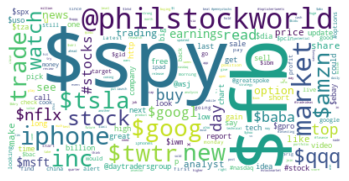

In [603]:
wordcloud = WordCloud(background_color="white").generate_from_frequencies(dict(word_frequencies))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('./images/aapl_word_fre.png')

In [83]:
from collections import Counter
stocks_frequencies = Counter(stocks)
hashtags_frequencies = Counter(hashtags)
persons_frequencies = Counter(persons)
vocab_frequencies = Counter(vocab)

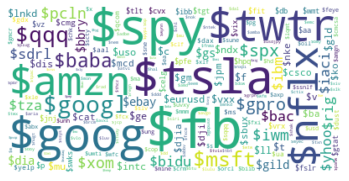

In [73]:
wordcloud = WordCloud(background_color="white").generate_from_frequencies(dict(stocks_frequencies))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('./images/aapl_stock_freq.png')

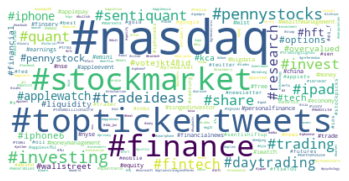

In [84]:
wordcloud = WordCloud(background_color="white").generate_from_frequencies(dict(hashtags_frequencies))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('./images/aapl_hashtag_freq.png')

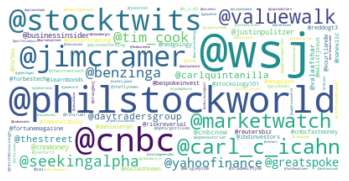

In [79]:
wordcloud = WordCloud(background_color="white").generate_from_frequencies(dict(persons_frequencies))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('./images/aapl_persons_freq.png')

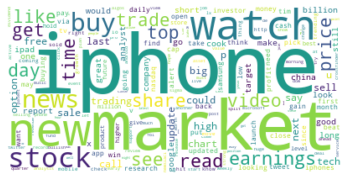

In [85]:
wordcloud = WordCloud(background_color="white").generate_from_frequencies(dict(vocab_frequencies))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('./images/aapl_vocab_freq.png')

##### Google

In [567]:
raw_goog =raw_tweets_by_asset.get_group('GOOG').content.values.tolist()

In [568]:
raw_goog[:5]

["RT @philstockworld: Summary of Yesterday's Webcast Featuring $AAPL $WYNN $GOOG $LGF #TraderEducation #Options #HedgingStrategies -- http://…",
 '2013 Wrap-Up And Trading Set Review - Part III http://t.co/7UbPGZRBGv $AAPL #APPLE $BP $CNW $CSCO $CSX $CVX $GOOG $HPQ $IBM $INTC $NGG',
 "RT @philstockworld: Summary of Yesterday's Webcast Featuring $AAPL $WYNN $GOOG $LGF #TraderEducation #Options #HedgingStrategies -- http://…",
 "RT @philstockworld: Summary of Yesterday's Webcast Featuring $AAPL $WYNN $GOOG $LGF #TraderEducation #Options #HedgingStrategies -- http://…",
 '.@Motorola drops #MotoX price to $399 for 2014 (by @CharlesJGantt) $GOOG http://t.co/STGjZYtiig']

In [591]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords.append('<elongated>')
stopwords.append('$goog')
stopwords.append('#goog')
stopwords.append('#google')
stopwords.append('google')
stopwords.append('rt')
stopwords.append('stock')
stopwords.append('today')
stopwords.append('year')
stopwords.append('week')
stopwords.append('u')
stopwords.append('goog')
stopwords.append('yesterday')

In [592]:
all_tokens = []
for t in raw_goog:
    all_tokens += pre_process_tokens(pre_process_document(t),stopwords)
all_tokens[:5]

['$aapl', '$wynn', '$lgf', '#tradereducation', '#options']

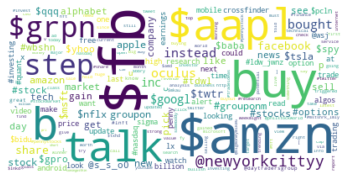

In [593]:
word_frequencies = Counter(all_tokens)
wordcloud = WordCloud(background_color="white").generate_from_frequencies(dict(word_frequencies))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('./images/goog_word_fre.png')

##### Amazon

In [582]:
raw_amzn =raw_tweets_by_asset.get_group('AMZN').content.values.tolist()

In [583]:
raw_amzn[:5]

['Apple Screwed Up Big Time http://t.co/Q2Pzk2VOMm $AMZN $AAPL',
 '$AMZN is getting on my nerves. so much for that 400',
 'RT @MadKindlePromos: Several incredible novels to help you to turbo-charge your Kindle! http://t.co/RH7tMr0I $AMZN  #bestsellers #books (vi…',
 "The first employees at Google, Amazon and Subway share stories of the companies' early days: http://t.co/vKzUCKvc0E $GOOG $AMZN",
 'RBC top 3 Internet longs for 2014: $GOOG (best play on online advertising); $AMZN (best play on online retail); $EBAY (poised for rebound)']

In [584]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords.append('<elongated>')
stopwords.append('$amzn')
stopwords.append('#amzn')
stopwords.append('#amazon')
stopwords.append('amazon')
stopwords.append('rt')
stopwords.append('stock')
stopwords.append('today')
stopwords.append('year')
stopwords.append('week')
stopwords.append('u')
stopwords.append('amzn')
stopwords.append('yesterday')

In [585]:
all_tokens = []
for t in raw_amzn:
    all_tokens += pre_process_tokens(pre_process_document(t),stopwords)
all_tokens[:5]

['apple', 'screwed', 'big', 'time', 'getting']

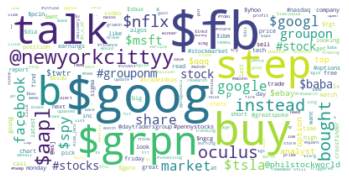

In [589]:
word_frequencies = Counter(all_tokens)
wordcloud = WordCloud(background_color="white").generate_from_frequencies(dict(word_frequencies))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('./images/amzn_word_fre.png')

Microsoft (MSFT)
At&T (T)
Intel (INTC)
J.P. Morgan (JPM)

#### Microsoft

In [607]:
raw_msft =raw_tweets_by_asset.get_group('MSFT').content.values.tolist()

In [608]:
raw_msft[:5]

['@BenedictEvans shocking that $MSFT is missing this opportunity',
 'RT @ACInvestorBlog: Stocks to Watch for January 2, 2014 http://t.co/cUNSVvvcsA $GURE $IRM $MSFT $RVBD $WYY',
 'Dow #Stocks Trend $AXP $UTX $CSCO $KO $HD $DIS $V $IBM $DD $INTC $JPM $UNH $TRV $MRK $MMM $GE $GS $MSFT $CAT  @ http://t.co/TvzJfd0RGT',
 "$MSFT wants to soar with eagles but keeps looking among sparrows to lead? Oncologist, not #SEINFELD's pimple-popping-dermatologist? #CNBC",
 'Microsoft Corporation : Microsoft Assigned Patent $MSFT http://t.co/m21LDJJfcp']

In [609]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords.append('<elongated>')
stopwords.append('$msft')
stopwords.append('#msft')
stopwords.append('#microsoft')
stopwords.append('microsoft')
stopwords.append('rt')
stopwords.append('stock')
stopwords.append('today')
stopwords.append('year')
stopwords.append('week')
stopwords.append('u')
stopwords.append('msft')
stopwords.append('yesterday')

In [610]:
all_tokens = []
for t in raw_msft:
    all_tokens += pre_process_tokens(pre_process_document(t),stopwords)
all_tokens[:5]

['@benedictevans', 'shocking', 'missing', 'opportunity', '@acinvestorblog']

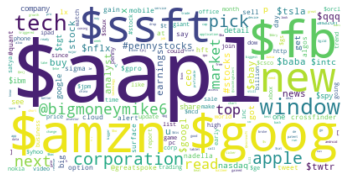

In [611]:
word_frequencies = Counter(all_tokens)
wordcloud = WordCloud(background_color="white").generate_from_frequencies(dict(word_frequencies))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('./images/msft_word_fre.png')

##### AT&T

In [612]:
raw_t =raw_tweets_by_asset.get_group('T').content.values.tolist()
raw_t[:5]

["ReTweEt Eff YoU'Ve NeVeR HaD uR FiR$T Ki$$&lt;33333",
 '$T - Is Vodafone a Solid Investment? -&gt; http://t.co/mRRm09MltH #stock #stocks #stockaction',
 'HAPPY NEW YEARS TO MY N$T SQUAD @AhColdKelo @bvsxdtrxb @pretty_hippy',
 'RT @vuhsace: HAPPY 2014 EA$T COAST.',
 'Isabel is Short on $T at #DowJones. Our profit 5.64%. Target price $28.44. More info on http://t.co/BqCz7TRmyf #stocks']

In [613]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords.append('<elongated>')
stopwords.append('$t')
stopwords.append('#t')
stopwords.append('#at&t')
stopwords.append('at&t')
stopwords.append('rt')
stopwords.append('stock')
stopwords.append('today')
stopwords.append('year')
stopwords.append('week')
stopwords.append('u')
stopwords.append('t')
stopwords.append('att')
stopwords.append('#att')
stopwords.append('yesterday')

In [614]:
all_tokens = []
for t in raw_t:
    all_tokens += pre_process_tokens(pre_process_document(t),stopwords)
all_tokens[:5]

['retweet', 'eff', 'never', 'ur', 'fir']

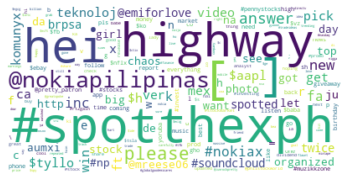

In [615]:
word_frequencies = Counter(all_tokens)
wordcloud = WordCloud(background_color="white").generate_from_frequencies(dict(word_frequencies))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('./images/t_word_fre.png')

#### Intel

In [616]:
raw_intc =raw_tweets_by_asset.get_group('INTC').content.values.tolist()
raw_intc[:5]

['2013 Wrap-Up And Trading Set Review - Part III http://t.co/7UbPGZRBGv $AAPL #APPLE $BP $CNW $CSCO $CSX $CVX $GOOG $HPQ $IBM $INTC $NGG',
 'Dow #Stocks Trend $AXP $UTX $CSCO $KO $HD $DIS $V $IBM $DD $INTC $JPM $UNH $TRV $MRK $MMM $GE $GS $MSFT $CAT  @ http://t.co/TvzJfd0RGT',
 '$INTC YouTube goes 4K, Google signs up long list of hardware partners for VP9 support http://t.co/mSJxDEWkQn',
 'Weekly Dow #Stocks Trend $DIS $WMT $HD $GS $V $INTC $IBM $UTX $VZ $UNH $T $MSFT $AXP $JPM $MRK $CSCO $KO $CVX  @ http://t.co/TvzJfd0RGT',
 'Company Update – Intel Corporation (NASDAQ:INTC) – Expect An Upside ... $INTC http://t.co/737mV5mEoy']

In [623]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords.append('<elongated>')
stopwords.append('$intc')
stopwords.append('#intc')
stopwords.append('#intel')
stopwords.append('intel')
stopwords.append('rt')
stopwords.append('stock')
stopwords.append('today')
stopwords.append('year')
stopwords.append('week')
stopwords.append('u')
stopwords.append('t')
stopwords.append('intc')
stopwords.append('yesterday')
stopwords.append('#stocks')
stopwords.append('#stock')
stopwords.append('corp')
stopwords.append('corporation')
stopwords.append('market')
stopwords.append('inc')

In [624]:
all_tokens = []
for t in raw_intc:
    all_tokens += pre_process_tokens(pre_process_document(t),stopwords)
all_tokens[:5]

['wrap', 'trading', 'set', 'review', 'part']

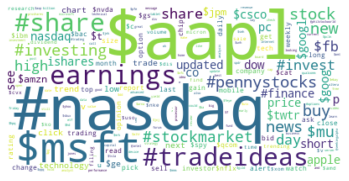

In [625]:
word_frequencies = Counter(all_tokens)
wordcloud = WordCloud(background_color="white").generate_from_frequencies(dict(word_frequencies))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('./images/intc_word_fre.png')

##### JP Mogran

In [626]:
raw_jpm =raw_tweets_by_asset.get_group('JPM').content.values.tolist()
raw_jpm[:5]

['Dow #Stocks Trend $AXP $UTX $CSCO $KO $HD $DIS $V $IBM $DD $INTC $JPM $UNH $TRV $MRK $MMM $GE $GS $MSFT $CAT  @ http://t.co/TvzJfd0RGT',
 'saw some big orders into the close on $KORS $V $AIG $JPM',
 '$S Showing on my streamers $RAD $JPM $AUY $ORCL $TWTR http://t.co/tNFq6VMEas',
 'Weekly Dow #Stocks Trend $DIS $WMT $HD $GS $V $INTC $IBM $UTX $VZ $UNH $T $MSFT $AXP $JPM $MRK $CSCO $KO $CVX  @ http://t.co/TvzJfd0RGT',
 'financials are looking very strong $XLF $BAC $C $JPM(long)']

In [633]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords.append('<elongated>')
stopwords.append('$jpm')
stopwords.append('#jpm')
stopwords.append('#jpmorgan')
stopwords.append('jpmorgan')
stopwords.append('rt')
stopwords.append('stock')
stopwords.append('today')
stopwords.append('year')
stopwords.append('week')
stopwords.append('u')
stopwords.append('jpmc')
stopwords.append('#jpmc')
stopwords.append('yesterday')
stopwords.append('#stocks')
stopwords.append('#stock')
stopwords.append('chase')
stopwords.append('co')
stopwords.append('jpm')
stopwords.append('morgan')
stopwords.append('j')
stopwords.append('p')

In [634]:
all_tokens = []
for t in raw_jpm:
    all_tokens += pre_process_tokens(pre_process_document(t),stopwords)
all_tokens[:5]

['$axp', '$utx', '$csco', '$ko', '$hd']

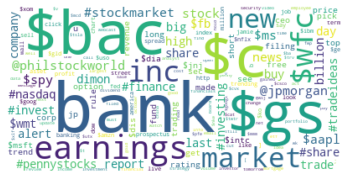

In [635]:
word_frequencies = Counter(all_tokens)
wordcloud = WordCloud(background_color="white").generate_from_frequencies(dict(word_frequencies))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('./images/jpm_word_fre.png')

## News

In [725]:
pre_processed_news = pd.read_csv(f'{dir_path}/preprocessed/news/news.csv')

In [726]:
pre_processed_news.head()

,timestamp,title,content,source
0,2014-01-01,business insider,back in clement c moore published the classic ...,news_full
1,2014-01-01,business insider,how much do million turkeys weigh that is the ...,news_full
2,2014-01-01,business insider,it is thanksgiving week once again and here at...,news_full
3,2014-01-01,business insider,if you take time to think about it the sun is ...,news_full
4,2014-01-01,business insider,now that it is the day after thanksgiving when...,news_full


In [727]:
pre_processed_news.title.isnull().values.any()

False

In [728]:
len(pre_processed_news)

100091

In [730]:
pre_processed_news[pre_processed_news.duplicated(keep = False)].head()

,timestamp,title,content,source
227,2014-01-04,business insider,profile icon an icon in the shape of a persons...,news_full
240,2014-01-04,business insider,profile icon an icon in the shape of a persons...,news_full
275,2014-01-04,business insider,profile icon an icon in the shape of a persons...,news_full
281,2014-01-05,business insider,profile icon an icon in the shape of a persons...,news_full
283,2014-01-05,business insider,profile icon an icon in the shape of a persons...,news_full


In [731]:
pre_processed_news.drop_duplicates(keep='first',inplace=True)

In [732]:
len(pre_processed_news)

100025

In [733]:
pre_processed_news.head()

,timestamp,title,content,source
0,2014-01-01,business insider,back in clement c moore published the classic ...,news_full
1,2014-01-01,business insider,how much do million turkeys weigh that is the ...,news_full
2,2014-01-01,business insider,it is thanksgiving week once again and here at...,news_full
3,2014-01-01,business insider,if you take time to think about it the sun is ...,news_full
4,2014-01-01,business insider,now that it is the day after thanksgiving when...,news_full


In [735]:
pre_processed_news.timestamp = pd.to_datetime(pre_processed_news.timestamp)
news_by_year = pre_processed_news.groupby(pre_processed_news['timestamp'].dt.year)

In [739]:
summary = news_by_year.describe()
summary

timestamp                                               title  \
              count unique        top freq      first       last  count   
timestamp                                                                 
2014          26852    365 2014-07-01  140 2014-01-01 2014-12-31  26852   
2015          37436    365 2015-09-16  203 2015-01-01 2015-12-31  37436   
2016          35737    366 2016-11-09  198 2016-01-01 2016-12-31  35737   

                                         ...  \
          unique               top freq  ...   
timestamp                                ...   
2014       25792  business insider  944  ...   
2015       36540  business insider  268  ...   
2016       35064  business insider  306  ...   

                                                     content                  \
                                                         top freq first last   
timestamp                                                                      
2014       kevin carmichael toews made clear this week th...   30   NaN  NaN   
2015       profile icon an icon in the shape of a persons...   81   NaN  NaN   
2016       profile icon an icon in the shape of a persons...  302   NaN  NaN   

          source                                      
           count unique        top   freq first last  
timestamp                                             
2014       26852      2  news_full  17727   NaN  NaN  
2015       37436      2  news_full  28307   NaN  NaN  
2016       35737      2  news_full  31183   NaN  NaN  

[3 rows x 24 columns]

In [742]:
data = summary.timestamp
data['year'] = data.index.values
data

/Users/user/miniconda3/envs/project/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,count,unique,top,freq,first,last,year
timestamp,,,,,,,
2014,26852,365,2014-07-01,140,2014-01-01,2014-12-31,2014
2015,37436,365,2015-09-16,203,2015-01-01,2015-12-31,2015
2016,35737,366,2016-11-09,198,2016-01-01,2016-12-31,2016


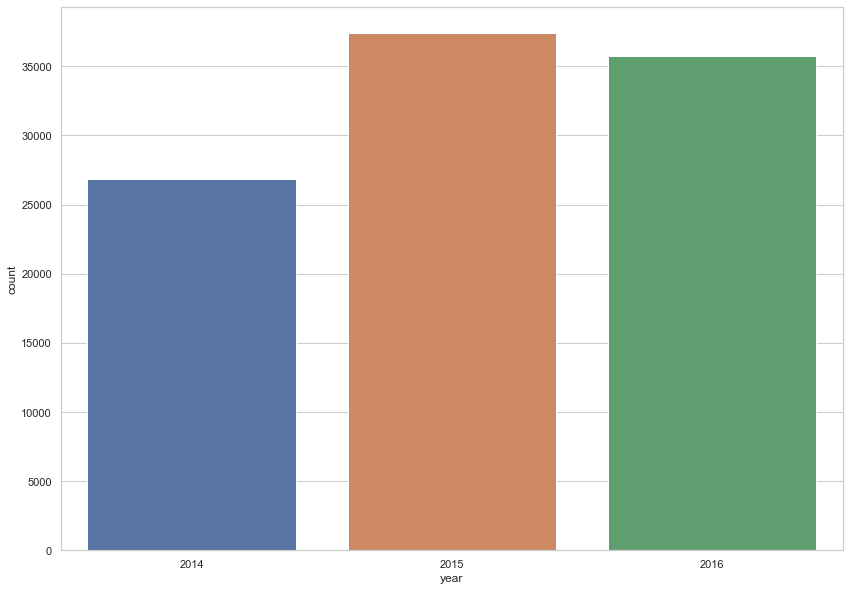

In [744]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))
ax = sns.barplot(x='year',y='count',data=data)

### 2014

In [749]:
news_group_2014 =news_by_year.get_group(2014)
news_group_2014['combined'] = news_group_2014[['title','content']].apply(lambda x:' '.join(x.dropna()), axis=1)

/Users/user/miniconda3/envs/project/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [751]:
news_group_2014[news_group_2014['content'].isna()].tail()

,timestamp,title,content,source,combined
26886,2014-12-31,russia annual inflation jumps to as rouble falls,NaN,news_title_only,russia annual inflation jumps to as rouble falls
26888,2014-12-31,indian government orders blocking of websites ...,NaN,news_title_only,indian government orders blocking of websites ...
26889,2014-12-31,euro zone politicians are not obliged to rescu...,NaN,news_title_only,euro zone politicians are not obliged to rescu...
26892,2014-12-31,greece dissolves parliament to prepare for ear...,NaN,news_title_only,greece dissolves parliament to prepare for ear...
26893,2014-12-31,newly published nsa documents show agency coul...,NaN,news_title_only,newly published nsa documents show agency coul...


In [757]:
assert(news_group_2014.loc[26892,:].combined == 'greece dissolves parliament to prepare for early elections')

In [801]:
def preprocess(text,stopwords):
    new_tokens = [w for w in word_tokenize(text) if w.isalpha()]
    new_no_stops = [t for t in new_tokens if t not in stopwords]
    wnl = WordNetLemmatizer()
    lemmatized = [wnl.lemmatize (t) for t in new_no_stops]
    final = [t for t in lemmatized if t not in stopwords]
    return final

In [799]:
all_string = ' '.join(news_group_2014.combined.values.tolist())

In [806]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords.append('said')
stopwords.append('say')
stopwords.append('may')
stopwords.append('even')
stopwords.append('still')
stopwords.append('year')
stopwords.append('many')
#stopwords.append('company')
stopwords.append('one')
stopwords.append('including')
stopwords.append('per')
stopwords.append('cent')
stopwords.append('two')
stopwords.append('time')
#stopwords.append('new')
#stopwords.append('well')


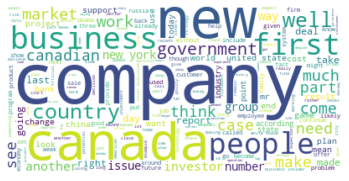

In [807]:
wordcloud = WordCloud(background_color="white").generate(' '.join(preprocess(all_string,stopwords)))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('./images/news_2014_word_fre.png')

### 2015

In [773]:
news_group_2015 =news_by_year.get_group(2015)
news_group_2015['combined'] = news_group_2015[['title','content']].apply(lambda x:' '.join(x.dropna()), axis=1)

/Users/user/miniconda3/envs/project/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [782]:
all_string_2015 = ' '.join(news_group_2015.combined.values.tolist())

In [794]:
counter_2015 = Counter(news_group_2015.combined.values.tolist())

In [796]:
counter_2015['business']

0

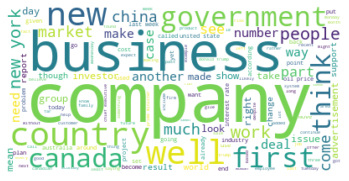

In [808]:
wordcloud = WordCloud(background_color="white").generate(' '.join(preprocess(all_string_2015,stopwords)))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('./images/news_2015_word_fre.png')

### 2016

In [784]:
news_group_2016 =news_by_year.get_group(2016)
news_group_2016['combined'] = news_group_2016[['title','content']].apply(lambda x:' '.join(x.dropna()), axis=1)

/Users/user/miniconda3/envs/project/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [785]:
all_string_2016 = ' '.join(news_group_2016.combined.values.tolist())

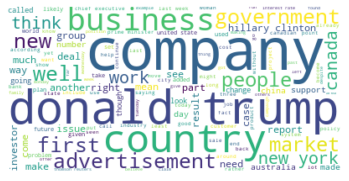

In [809]:
wordcloud = WordCloud(background_color="white").generate(' '.join(preprocess(all_string_2016,stopwords)))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('./images/news_2016_word_fre.png')